<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [68]:
import requests
import pandas as pd
import bs4
import matplotlib.pyplot as plt

Download the webpage at the url


In [69]:
req = requests.get(url)

Create a soup object


In [70]:
soup = bs4.BeautifulSoup(req.content)

Scrape the `Language name` and `annual average salary`.


In [71]:
langs = []
avg_salary = []
for row in soup.find_all('tr')[1:]:
    cols = row.find_all('td')
    langs.append(cols[1].text)
    avg_salary.append(cols[3].text)

In [72]:
df = pd.DataFrame({'Language Name': langs, 'Annual average salary': avg_salary})
formatted = df['Annual average salary'].str.replace(',', '').str.replace('$', '', regex=False)
df['Annual average salary'] = formatted.astype(int)
df.to_csv('popular-languages.csv', index=False)

In [73]:
df.sort_values(by='Annual average salary', ascending=False, inplace=True)

Text(0.5, 1.0, 'Annual Average Salary by Technology')

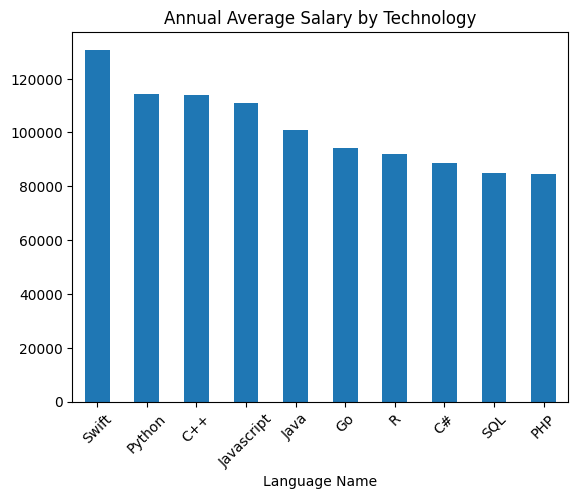

In [76]:
df.plot.bar(x='Language Name', y='Annual average salary', legend=False)
plt.tick_params(axis='x', rotation=45)
plt.title('Annual Average Salary by Technology')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
